<a href="https://colab.research.google.com/github/yourmakerz/loan_check/blob/main/Loan_final_project_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
os.listdir("/content/drive/MyDrive/ColabNotebooks/Ontario_Tech/Data_set/Loan_Predict")


['.ipynb_checkpoints', 'Loan_predict.csv']

In [3]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score


In [5]:
# Advanced ML
import xgboost as xgb
import shap

# Deep Learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [6]:
# Load dataset
file_path_loan_predict = "/content/drive/MyDrive/ColabNotebooks/Ontario_Tech/Data_set/Loan_Predict/Loan_predict.csv"
df_loan_predict = pd.read_csv(file_path_loan_predict)

# Basic checks
print("Shape of dataset:", df_loan_predict.shape)
print("\nSample rows:")
print(df_loan_predict.head())

print("\nMissing values:")
print(df_loan_predict.isnull().sum())

Shape of dataset: (1000000, 51)

Sample rows:
   CreditScore  AnnualIncome  LoanAmount  LoanDuration  Age EmploymentStatus  \
0          402         63295       18830            13   29    Self-Employed   
1          735         55936       23729             1   42    Self-Employed   
2          570         62547       19660             7   54    Self-Employed   
3          406         46129       21674            23   25    Self-Employed   
4          371         57725       12189            26   42         Employed   

  MaritalStatus  NumberOfDependents EducationLevel HomeOwnershipStatus  ...  \
0       Widowed                   2      Doctorate               Other  ...   
1      Divorced                   3         Master                 Own  ...   
2        Single                   3      Doctorate            Mortgage  ...   
3      Divorced                   3    High School               Other  ...   
4       Widowed                   4         Master                 Own  ...   

In [7]:
print("\nColumns in dataset:")
print(df_loan_predict.columns.tolist())



Columns in dataset:
['CreditScore', 'AnnualIncome', 'LoanAmount', 'LoanDuration', 'Age', 'EmploymentStatus', 'MaritalStatus', 'NumberOfDependents', 'EducationLevel', 'HomeOwnershipStatus', 'MonthlyDebtPayments', 'CreditCardUtilizationRate', 'NumberOfOpenCreditLines', 'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory', 'LoanPurpose', 'PreviousLoanDefaults', 'InterestRate', 'PaymentHistory', 'SavingsAccountBalance', 'CheckingAccountBalance', 'InvestmentAccountBalance', 'RetirementAccountBalance', 'EmergencyFundBalance', 'TotalAssets', 'TotalLiabilities', 'NetWorth', 'LengthOfCreditHistory', 'MortgageBalance', 'RentPayments', 'AutoLoanBalance', 'PersonalLoanBalance', 'StudentLoanBalance', 'UtilityBillsPaymentHistory', 'HealthInsuranceStatus', 'LifeInsuranceStatus', 'CarInsuranceStatus', 'HomeInsuranceStatus', 'OtherInsurancePolicies', 'EmployerType', 'JobTenure', 'MonthlySavings', 'AnnualBonuses', 'AnnualExpenses', 'MonthlyHousingCosts', 'MonthlyTransportationCosts', 'Mo

In [8]:
print("\n--- Dataset Info ---")
print(df_loan_predict.info())


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 51 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   CreditScore                 1000000 non-null  int64  
 1   AnnualIncome                1000000 non-null  int64  
 2   LoanAmount                  1000000 non-null  int64  
 3   LoanDuration                1000000 non-null  int64  
 4   Age                         1000000 non-null  int64  
 5   EmploymentStatus            1000000 non-null  object 
 6   MaritalStatus               1000000 non-null  object 
 7   NumberOfDependents          1000000 non-null  int64  
 8   EducationLevel              1000000 non-null  object 
 9   HomeOwnershipStatus         1000000 non-null  object 
 10  MonthlyDebtPayments         1000000 non-null  int64  
 11  CreditCardUtilizationRate   1000000 non-null  float64
 12  NumberOfOpenCreditLines     1000000

Exploring feature importance

In [9]:
from xgboost import XGBClassifier

In [10]:
# Define features and target
X = df_loan_predict.drop('LoanApproved', axis=1)
y = df_loan_predict['LoanApproved']

In [11]:
# Encode categorical features if not already done
X = pd.get_dummies(X, drop_first=True)

# Train XGBoost for feature importance
xgb_model = XGBClassifier()
xgb_model.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

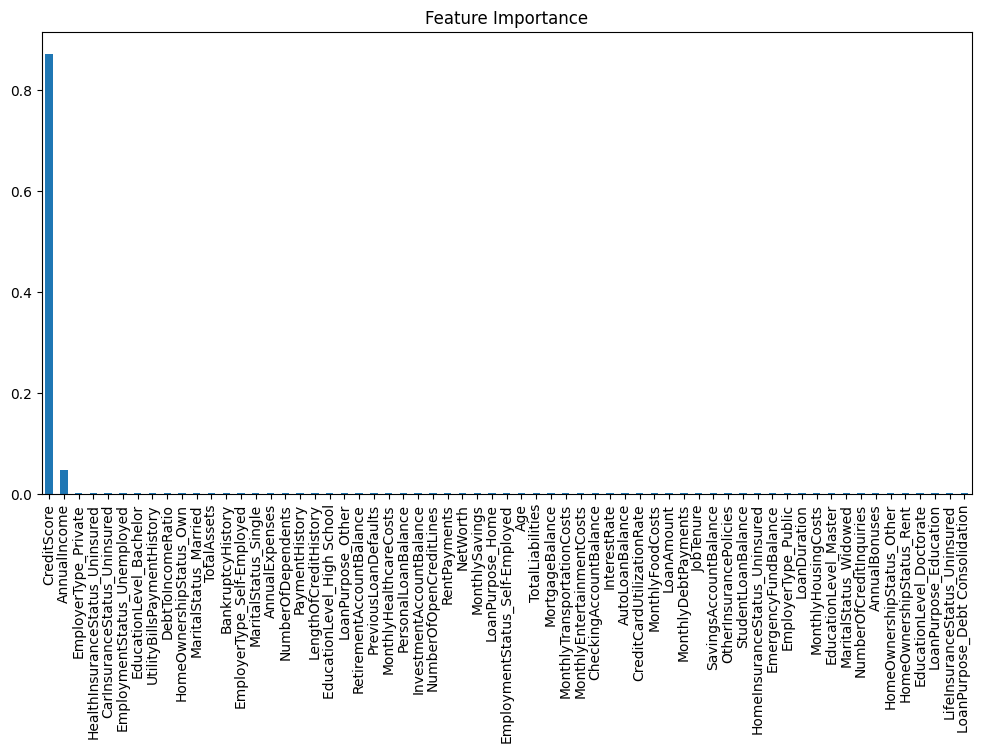

In [12]:
# Plot feature importance
feature_importance = pd.Series(xgb_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6), title="Feature Importance")
plt.show()

In [13]:
from sklearn.feature_selection import mutual_info_classif


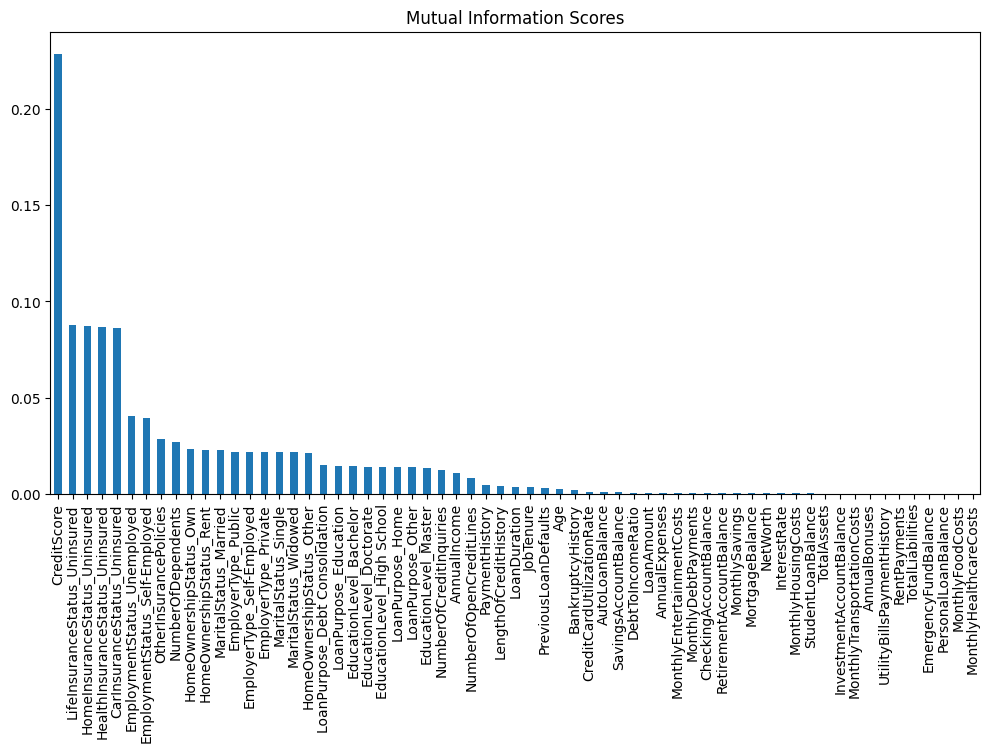

In [14]:
# Calculate mutual information for feature-target relationship
mi_scores = mutual_info_classif(X, y, random_state=42)
mi_scores_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

# Plot MI scores
mi_scores_series.plot(kind='bar', figsize=(12, 6), title="Mutual Information Scores")
plt.show()

In [15]:
print("\n--- Missing Values ---")
print(df_loan_predict.isnull().sum().sort_values(ascending=False).head(10))  # Top 10 features with missing values


--- Missing Values ---
CreditScore            0
AnnualIncome           0
LoanAmount             0
LoanDuration           0
Age                    0
EmploymentStatus       0
MaritalStatus          0
NumberOfDependents     0
EducationLevel         0
HomeOwnershipStatus    0
dtype: int64


In [16]:
print("\n--- Descriptive Stats ---")
print(df_loan_predict.describe())



--- Descriptive Stats ---
          CreditScore    AnnualIncome      LoanAmount    LoanDuration  \
count  1000000.000000  1000000.000000  1000000.000000  1000000.000000   
mean       574.559628    59971.227298    20001.643495       15.014402   
std        158.774753    15013.989902     5000.662270        8.363599   
min        300.000000    -9666.000000    -4900.000000        1.000000   
25%        437.000000    49855.000000    16630.000000        8.000000   
50%        574.000000    59973.000000    20006.000000       15.000000   
75%        712.000000    70080.000000    23376.000000       22.000000   
max        849.000000   132414.000000    44921.000000       29.000000   

                  Age  NumberOfDependents  MonthlyDebtPayments  \
count  1000000.000000      1000000.000000       1000000.000000   
mean        43.497517            1.999334           499.712597   
std         15.005348            1.415219           199.942646   
min         18.000000            0.000000          

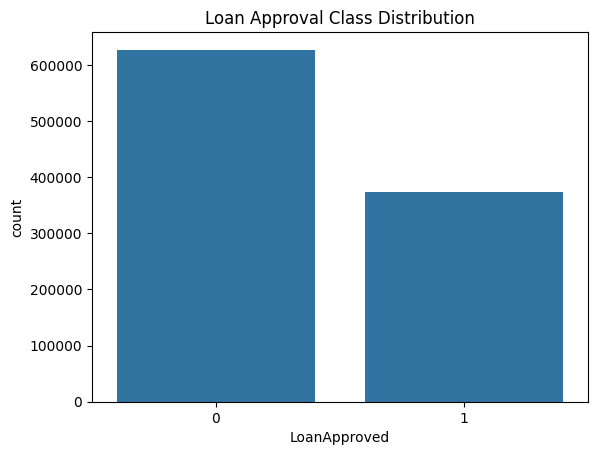

LoanApproved
0    0.626831
1    0.373169
Name: proportion, dtype: float64


In [17]:
sns.countplot(x='LoanApproved', data=df_loan_predict)
plt.title("Loan Approval Class Distribution")
plt.show()

print(df_loan_predict['LoanApproved'].value_counts(normalize=True))


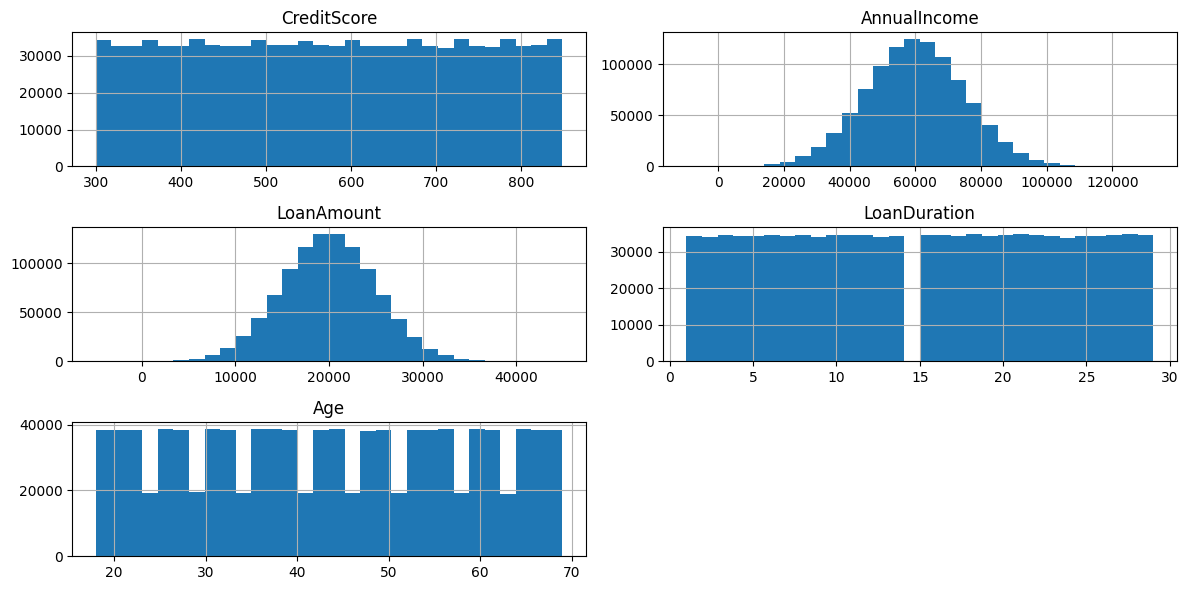

In [18]:
# Plot distribution of numerical features
numerical_cols = ['CreditScore', 'AnnualIncome', 'LoanAmount', 'LoanDuration', 'Age']
df_loan_predict[numerical_cols].hist(figsize=(12, 6), bins=30)
plt.tight_layout()
plt.show()


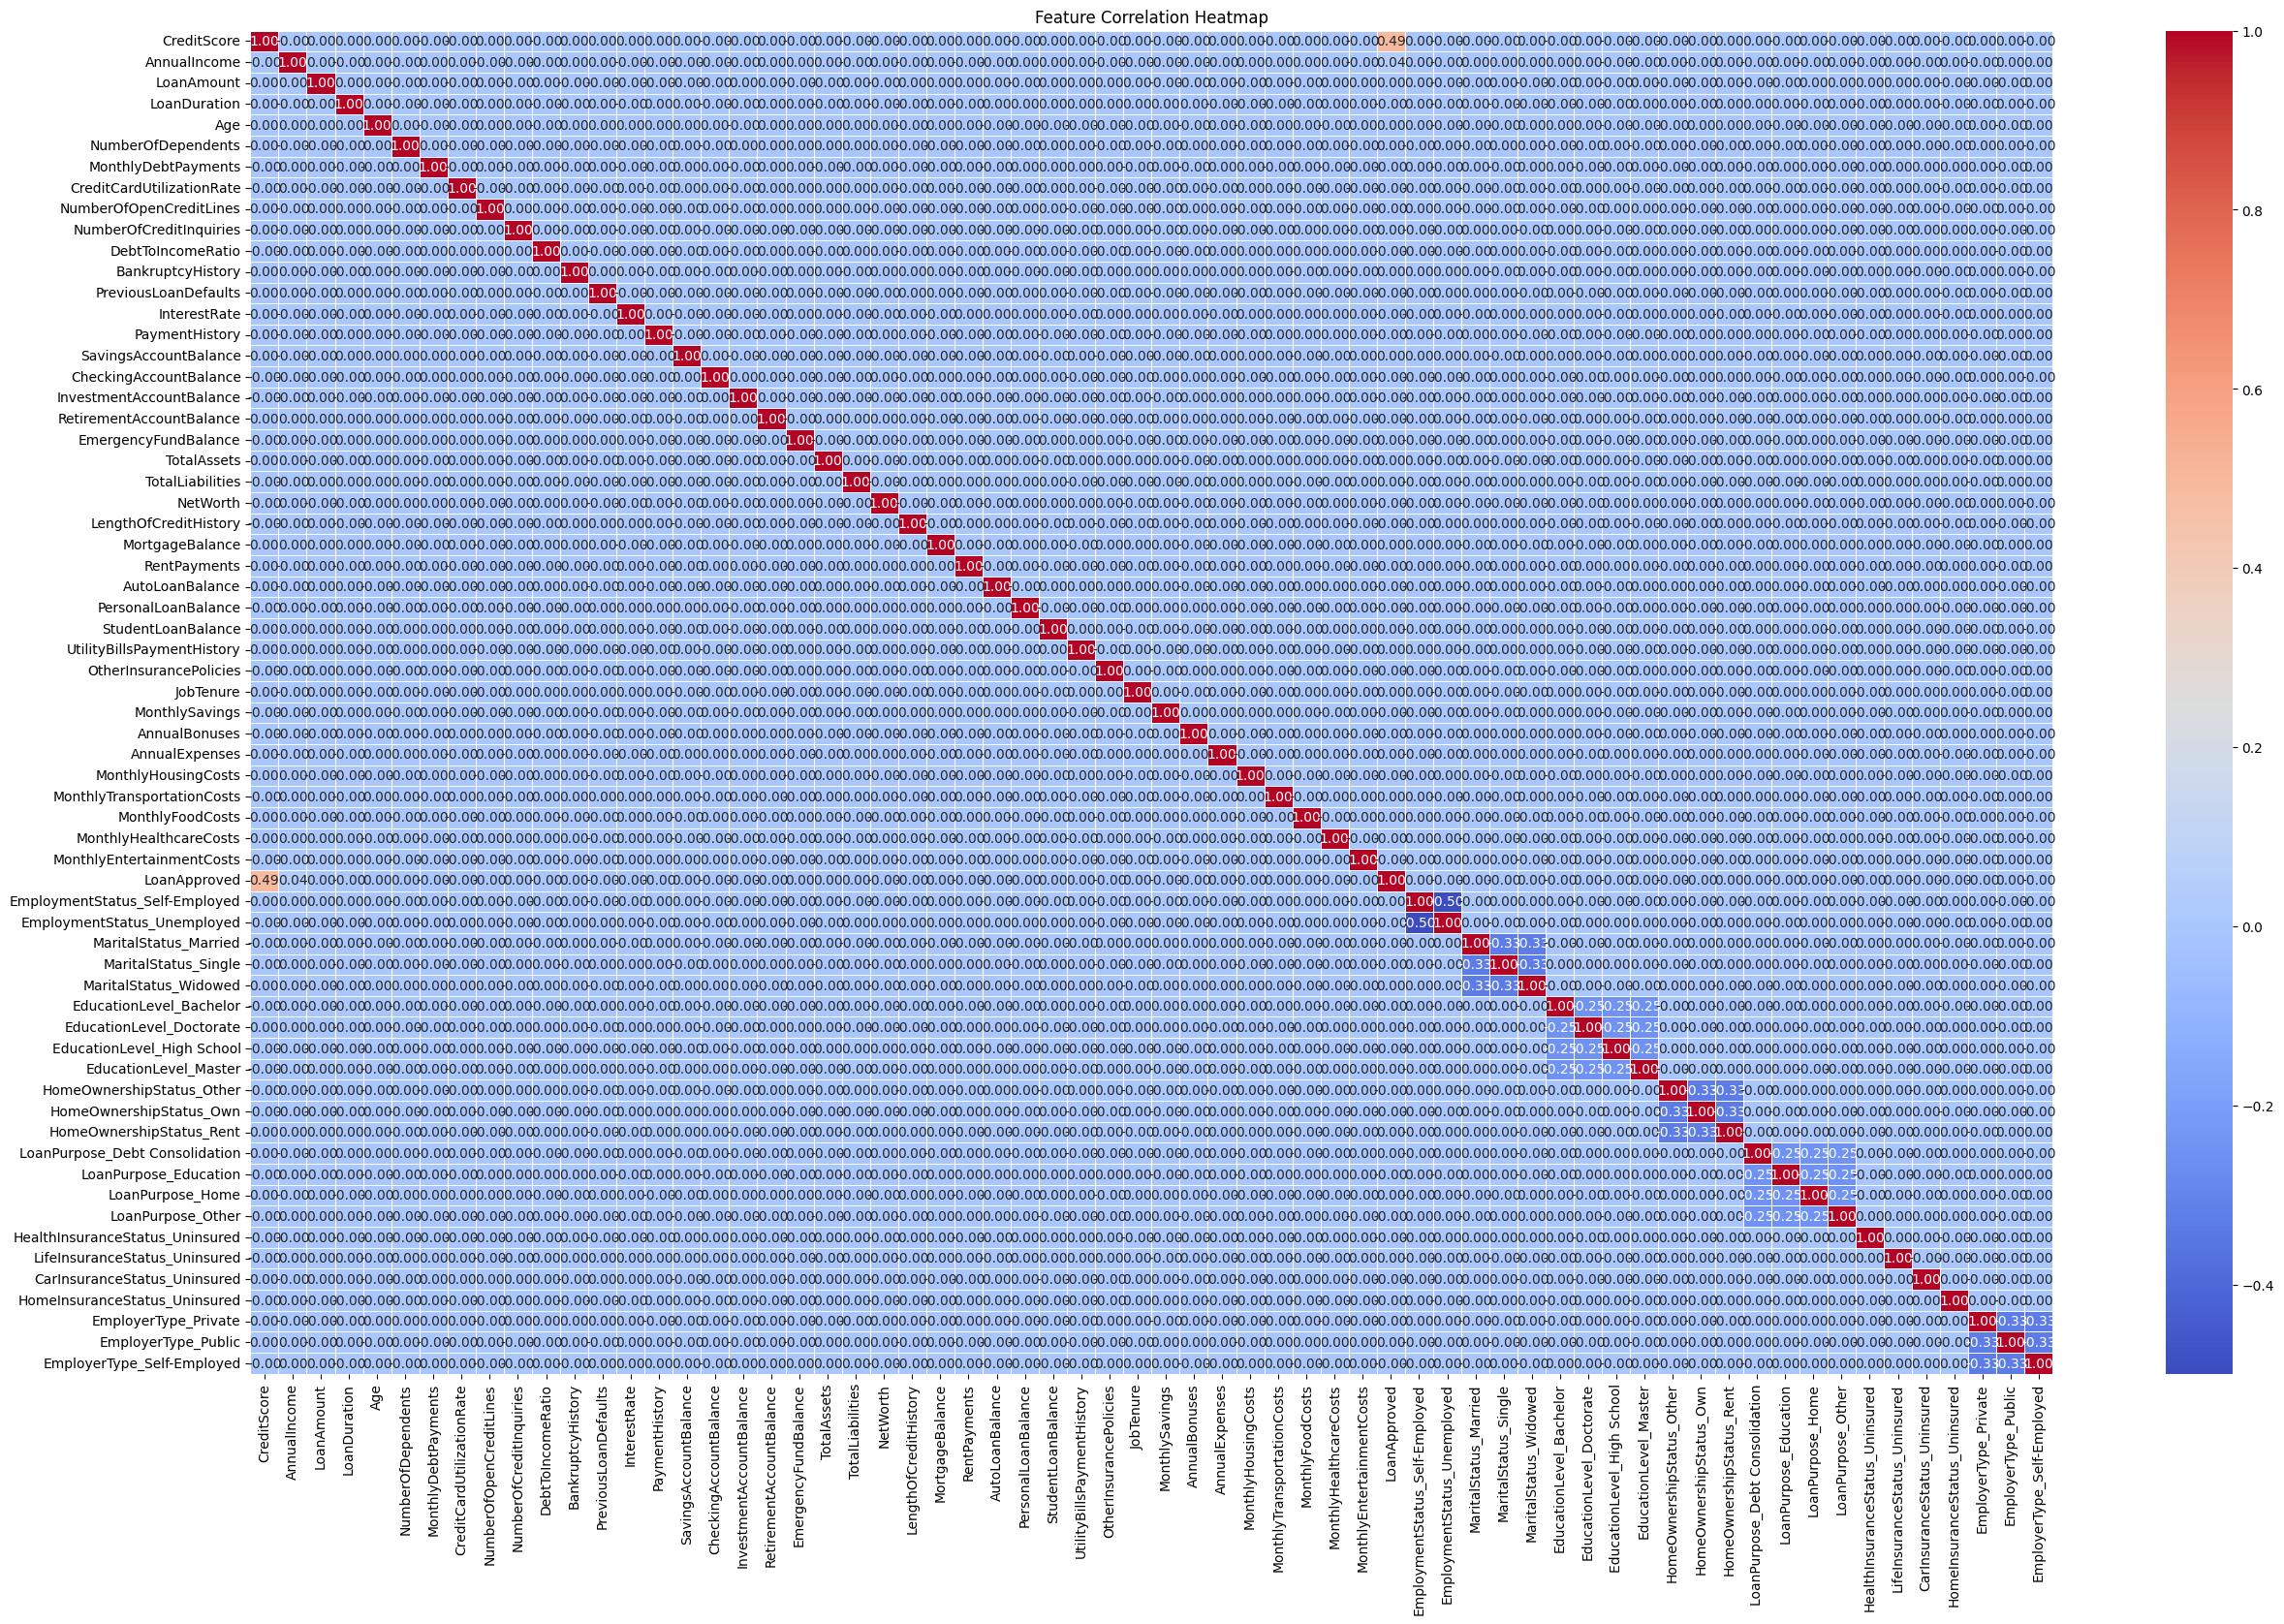

In [19]:
# One-hot encode categorical columns
df_loan_encoded = pd.get_dummies(df_loan_predict, drop_first=True)

# Calculate correlation matrix
correlation_matrix = df_loan_encoded.corr()

# Plot heatmap
plt.figure(figsize=(30, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [20]:
## Encode Categorical Columns (for ML)

# List of categorical columns
categorical_cols = df_loan_predict.select_dtypes(include='object').columns.tolist()
print("\nCategorical Columns:", categorical_cols)

# Encode them using LabelEncoder
encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_loan_predict[col] = le.fit_transform(df_loan_predict[col])
    encoders[col] = le



Categorical Columns: ['EmploymentStatus', 'MaritalStatus', 'EducationLevel', 'HomeOwnershipStatus', 'LoanPurpose', 'HealthInsuranceStatus', 'LifeInsuranceStatus', 'CarInsuranceStatus', 'HomeInsuranceStatus', 'EmployerType']


Eligibility Prediction (Neural Net Classifier)

In [21]:
## Feature Groups for DNN Model
eligibility_features = [
    'CreditScore', 'AnnualIncome', 'LoanAmount', 'LoanDuration',
    'Age', 'EmploymentStatus', 'EducationLevel', 'HomeOwnershipStatus',
    'DebtToIncomeRatio', 'LoanPurpose', 'JobTenure', 'MonthlyDebtPayments'
]

In [22]:
df_eligibility = df_loan_predict[eligibility_features + ['LoanApproved']].copy()


In [23]:
# Label encode categorical columns
eligibility_encoders = {}
for col in ['EmploymentStatus', 'EducationLevel', 'HomeOwnershipStatus', 'LoanPurpose']:
    le = LabelEncoder()
    df_eligibility[col] = le.fit_transform(df_eligibility[col])
    eligibility_encoders[col] = le

In [24]:

# Split data
X_elig = df_eligibility.drop('LoanApproved', axis=1)
y_elig = df_eligibility['LoanApproved']
X_train_elig, X_test_elig, y_train_elig, y_test_elig = train_test_split(X_elig, y_elig, test_size=0.35, random_state=42)

In [25]:
# Scale data
#scaler_eligibility_check = StandardScaler()
#X_train_elig = scaler_eligibility_check.fit_transform(X_train_elig)
#X_test_elig = scaler_eligibility_check.transform(X_test_elig)


In [26]:
#eligibility_model_columns = pd.get_dummies(pd.DataFrame(X_train_elig)).columns.tolist()


In [27]:
##Encode & Scale Eligibility Features
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [28]:
#eligibility_cats = ['EmploymentStatus', 'EducationLevel', 'HomeOwnershipStatus', 'LoanPurpose']
#eligibility_encoders = {}

#for col in eligibility_cats:
#    le = LabelEncoder()
#    df_eligibility[col] = le.fit_transform(df_eligibility[col])
#    eligibility_encoders[col] = le

In [29]:
from imblearn.over_sampling import SMOTE

In [30]:
X_train_elig, X_test_elig, y_train_elig, y_test_elig = train_test_split(X_elig, y_elig, test_size=0.35, random_state=42)

In [31]:
print("Shape of X_elig:", X_test_elig.shape)
print("Shape of y_elig:", y_test_elig.shape)

Shape of X_elig: (350000, 12)
Shape of y_elig: (350000,)


In [32]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train_elig, y_train_elig)

In [33]:
# Scale features
scaler_eligibility_check = StandardScaler()
#X_elig_scaled = scaler_eligibility_check.fit_transform(X_elig)


In [34]:
# Fit on resampled training data
X_res_scaled = scaler_eligibility_check.fit_transform(X_res)
# Transform test data
X_test_elig_scaled = scaler_eligibility_check.transform(X_test_elig)

In [35]:
print("Shape of X_res_scaled:", X_res_scaled.shape)
print("Shape of X_test_elig_scaled:", X_test_elig_scaled.shape)

Shape of X_res_scaled: (815618, 12)
Shape of X_test_elig_scaled: (350000, 12)


In [36]:
from collections import Counter
print("Class distribution after SMOTE:", Counter(y_res))

Class distribution after SMOTE: Counter({1: 407809, 0: 407809})


In [37]:
## Neural Network for Loan Eligibility predition
## use DNN classifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Normalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import BatchNormalization
from math import e
from tensorflow.keras.regularizers import l2

In [38]:

# Define deeper model with 4 dense layers
eligibility_model = Sequential([
    Dense(256, activation='relu', kernel_regularizer=l2(0.001), input_shape=(X_res_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),

    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

eligibility_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           3,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 48,897 (191.00 KB)

 Trainable params: 48,001 (187.50 KB)

 Non-trainable params: 896 (3.50 KB)

In [39]:
eligibility_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [40]:
# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

# Reduce learning rate when the model stops improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)


In [41]:
from sklearn.utils.class_weight import compute_class_weight

class_weights_elig = dict(enumerate(compute_class_weight('balanced', classes=np.unique(y_res), y=y_res)))



In [42]:
# Train
history_elig = eligibility_model.fit(
    X_res_scaled, y_res,  # Use SMOTE resampled and scaled data
    validation_data=(X_test_elig_scaled, y_test_elig),  # Validate on scaled test data
    epochs=30,
    batch_size=128,
    class_weight=class_weights_elig,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

Epoch 1/30
6373/6373 ━━━━━━━━━━━━━━━━━━━━ 54s 8ms/step - accuracy: 0.7663 - loss: 0.5949 - val_accuracy: 0.7448 - val_loss: 0.4669 - learning_rate: 0.0010
Epoch 2/30
6373/6373 ━━━━━━━━━━━━━━━━━━━━ 50s 8ms/step - accuracy: 0.7921 - loss: 0.4403 - val_accuracy: 0.7476 - val_loss: 0.4562 - learning_rate: 0.0010
Epoch 3/30
6373/6373 ━━━━━━━━━━━━━━━━━━━━ 49s 8ms/step - accuracy: 0.7941 - loss: 0.4338 - val_accuracy: 0.7472 - val_loss: 0.4537 - learning_rate: 0.0010
Epoch 4/30
6373/6373 ━━━━━━━━━━━━━━━━━━━━ 47s 7ms/step - accuracy: 0.7949 - loss: 0.4302 - val_accuracy: 0.7485 - val_loss: 0.4468 - learning_rate: 0.0010
Epoch 5/30
6373/6373 ━━━━━━━━━━━━━━━━━━━━ 48s 7ms/step - accuracy: 0.7958 - loss: 0.4286 - val_accuracy: 0.7487 - val_loss: 0.4513 - learning_rate: 0.0010
Epoch 6/30
6373/6373 ━━━━━━━━━━━━━━━━━━━━ 47s 7ms/step - accuracy: 0.7957 - loss: 0.4279 - val_accuracy: 0.7470 - val_loss: 0.4568 - learning_rate: 0.0010
Epoch 7/30
6373/6373 ━━━━━━━━━━━━━━━━━━━━ 50s 8ms/step - accuracy: 0.7

In [43]:
# Predict
y_pred_elig_prob = eligibility_model.predict(X_test_elig_scaled)
y_pred_elig = (y_pred_elig_prob >= 0.45).astype(int)

# Evaluation
print("\n--- Eligibility Neural Net Report ---")
print(classification_report(y_test_elig, y_pred_elig))
print("Confusion Matrix:\n", confusion_matrix(y_test_elig, y_pred_elig))
print("ROC AUC Score:", roc_auc_score(y_test_elig, y_pred_elig_prob))

10938/10938 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step

--- Eligibility Neural Net Report ---
              precision    recall  f1-score   support

           0       0.99      0.61      0.75    219022
           1       0.60      0.99      0.75    130978

    accuracy                           0.75    350000
   macro avg       0.80      0.80      0.75    350000
weighted avg       0.85      0.75      0.75    350000

Confusion Matrix:
 [[132762  86260]
 [  1084 129894]]
ROC AUC Score: 0.8013844453329233


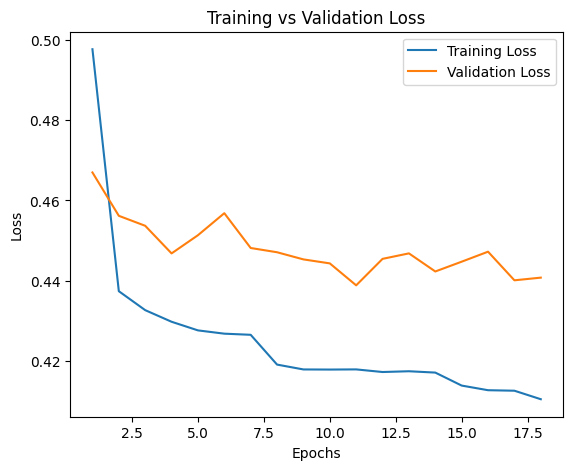

In [44]:
# Extract history data
history = history_elig.history
epochs = range(1, len(history['loss']) + 1)

# Plot loss
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, history['loss'], label='Training Loss')
plt.plot(epochs, history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

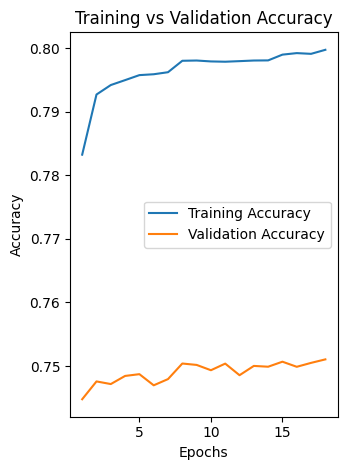

In [45]:
# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, history['accuracy'], label='Training Accuracy')
plt.plot(epochs, history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [47]:
# --- Model 1: Logistic Regression ---
logreg_model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
logreg_model.fit(X_res_scaled, y_res)


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [48]:
# Predictions on test data
y_pred_logreg = logreg_model.predict(X_test_elig_scaled)
y_pred_proba_logreg = logreg_model.predict_proba(X_test_elig_scaled)[:, 1]  # For ROC AUC

In [49]:
print("\nLogistic Regression Report:")
print(classification_report(y_test_elig, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test_elig, y_pred_logreg))
print("ROC AUC Score:", roc_auc_score(y_test_elig, y_pred_proba_logreg))


Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.80      0.71      0.75    219022
           1       0.59      0.71      0.64    130978

    accuracy                           0.71    350000
   macro avg       0.70      0.71      0.70    350000
weighted avg       0.72      0.71      0.71    350000

Confusion Matrix:
 [[154665  64357]
 [ 38203  92775]]
ROC AUC Score: 0.7876240671478284


In [50]:
# Initialize and train Decision Tree
dt_model = DecisionTreeClassifier(max_depth=20, random_state=42, class_weight='balanced')
dt_model.fit(X_res_scaled, y_res)

DecisionTreeClassifier(class_weight='balanced', max_depth=20, random_state=42)

In [51]:
# Predictions on test data
y_pred_dt = dt_model.predict(X_test_elig_scaled)
y_pred_proba_dt = dt_model.predict_proba(X_test_elig_scaled)[:, 1]  # For ROC AUC

In [52]:
print("\n--- Decision Tree Report ---")
print(classification_report(y_test_elig, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test_elig, y_pred_dt))
print("ROC AUC Score:", roc_auc_score(y_test_elig, y_pred_proba_dt))


--- Decision Tree Report ---
              precision    recall  f1-score   support

           0       0.91      0.65      0.76    219022
           1       0.60      0.89      0.72    130978

    accuracy                           0.74    350000
   macro avg       0.75      0.77      0.74    350000
weighted avg       0.79      0.74      0.74    350000

Confusion Matrix:
 [[141884  77138]
 [ 14649 116329]]
ROC AUC Score: 0.7855516264999092


In [53]:
import joblib

# Save scaler
joblib.dump(scaler_eligibility_check, 'scaler_eligibility.pkl')

# Save label encoders
joblib.dump(eligibility_encoders, 'eligibility_label_encoders.pkl')

# Save model
eligibility_model.save('eligibility_model.h5')


Possible Risk of repayment - ANN

In [54]:
risk_ann_features = [
    'CreditScore', 'AnnualIncome', 'LoanAmount', 'LoanDuration',
    'MonthlyDebtPayments', 'DebtToIncomeRatio', 'PreviousLoanDefaults',
    'BankruptcyHistory', 'InterestRate', 'JobTenure'
]

In [55]:
## data preparation
df_risk_ann = df_loan_predict[risk_ann_features + ['LoanApproved']].copy()
X_risk_ann = df_risk_ann.drop('LoanApproved', axis=1)
y_risk_ann = df_risk_ann['LoanApproved']

In [56]:
# Train-Test Split
X_train_risk, X_test_risk, y_train_risk, y_test_risk = train_test_split(X_risk_ann, y_risk_ann, test_size=0.2, random_state=42)

# Scale features
scaler_risk = StandardScaler()
X_train_risk_scaled = scaler_risk.fit_transform(X_train_risk)
X_test_risk_scaled = scaler_risk.transform(X_test_risk)

In [57]:
from tensorflow.keras.metrics import AUC
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

In [58]:
## ANN
# Model architecture config

num_columns_risk = X_train_risk_scaled.shape[1]
num_labels_risk = 1
hidden_units_risk = [150, 150, 150]
dropout_rates_risk = [0.3, 0.3, 0.2, 0.1]
learning_rate_risk = 5e-4


In [59]:
def build_risk_ann_model(num_columns, num_labels, hidden_units, dropout_rates, learning_rate):
    inp = Input(shape=(num_columns,))
    x = BatchNormalization()(inp)
    x = Dropout(dropout_rates[0])(x)
    for i in range(len(hidden_units)):
        x = Dense(hidden_units[i], activation='relu', kernel_regularizer=l2(0.001))(x)
        x = BatchNormalization()(x)
        x = Dropout(dropout_rates[i + 1])(x)
    out = Dense(num_labels, activation='sigmoid')(x)
    model = Model(inputs=inp, outputs=out)

    # Compile the refined model
    model.compile(optimizer=Adam(learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [60]:
class_weights_risk = dict(enumerate(compute_class_weight('balanced', classes=np.array([0, 1]), y=y_train_risk)))

In [61]:
# Early stopping to prevent overfitting
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=7,
    restore_best_weights=True
)

# Reduce learning rate when the model stops improving
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=2,
    min_lr=1e-6
)

In [62]:
# Build model
risk_ann_model = build_risk_ann_model(num_columns_risk, num_labels_risk, hidden_units_risk, dropout_rates_risk, learning_rate_risk)
risk_ann_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 10)                  │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 150)                 │           1,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 150)                 │             600 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 150)                 │          22,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 150)                 │             600 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 150)                 │          22,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 150)                 │             600 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             151 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 48,941 (191.18 KB)

 Trainable params: 48,021 (187.58 KB)

 Non-trainable params: 920 (3.59 KB)

In [63]:
# Train model
history_risk_ann = risk_ann_model.fit(
    X_train_risk_scaled, y_train_risk,
    validation_split=0.2,
    epochs=30,
    batch_size=125,
    class_weight = class_weights_risk,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

Epoch 1/30
5120/5120 ━━━━━━━━━━━━━━━━━━━━ 38s 7ms/step - accuracy: 0.6386 - loss: 0.7590 - val_accuracy: 0.7350 - val_loss: 0.4842 - learning_rate: 5.0000e-04
Epoch 2/30
5120/5120 ━━━━━━━━━━━━━━━━━━━━ 34s 7ms/step - accuracy: 0.6612 - loss: 0.5336 - val_accuracy: 0.7382 - val_loss: 0.4822 - learning_rate: 5.0000e-04
Epoch 3/30
5120/5120 ━━━━━━━━━━━━━━━━━━━━ 35s 7ms/step - accuracy: 0.6632 - loss: 0.5266 - val_accuracy: 0.7367 - val_loss: 0.4769 - learning_rate: 5.0000e-04
Epoch 4/30
5120/5120 ━━━━━━━━━━━━━━━━━━━━ 35s 7ms/step - accuracy: 0.6643 - loss: 0.5261 - val_accuracy: 0.7365 - val_loss: 0.4740 - learning_rate: 5.0000e-04
Epoch 5/30
5120/5120 ━━━━━━━━━━━━━━━━━━━━ 34s 7ms/step - accuracy: 0.6628 - loss: 0.5252 - val_accuracy: 0.7362 - val_loss: 0.4747 - learning_rate: 5.0000e-04
Epoch 6/30
5120/5120 ━━━━━━━━━━━━━━━━━━━━ 35s 7ms/step - accuracy: 0.6654 - loss: 0.5233 - val_accuracy: 0.7376 - val_loss: 0.4750 - learning_rate: 5.0000e-04
Epoch 7/30
5120/5120 ━━━━━━━━━━━━━━━━━━━━ 34s 

In [64]:
# Predict
y_pred_ann_risk = risk_ann_model.predict(X_test_risk_scaled)
y_pred_ann = (y_pred_ann_risk >= 0.3).astype(int)

# Evaluation
print("\n--- Risk of repayment Report ---")
print(classification_report(y_test_risk, y_pred_ann))
print("Confusion Matrix:\n", confusion_matrix(y_test_risk, y_pred_ann))
print("ROC AUC Score:", roc_auc_score(y_test_risk, y_pred_ann_risk))

6250/6250 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step

--- Risk of repayment Report ---
              precision    recall  f1-score   support

           0       1.00      0.55      0.71    125418
           1       0.57      1.00      0.72     74582

    accuracy                           0.71    200000
   macro avg       0.78      0.77      0.71    200000
weighted avg       0.84      0.71      0.71    200000

Confusion Matrix:
 [[68361 57057]
 [    0 74582]]
ROC AUC Score: 0.7932506966394115


In [65]:
import matplotlib.pyplot as plt

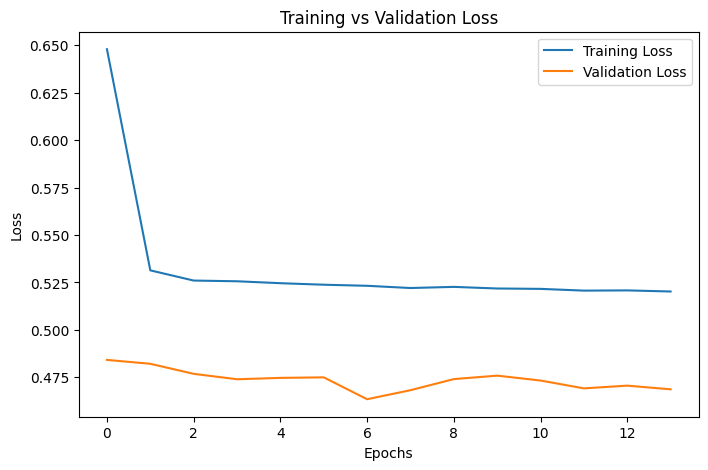

In [66]:
## Training vs Validation Loss & AUC
# Plot Loss
plt.figure(figsize=(8, 5))
plt.plot(history_risk_ann.history['loss'], label='Training Loss')
plt.plot(history_risk_ann.history['val_loss'], label='Validation Loss')
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [67]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import numpy as np

6250/6250 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


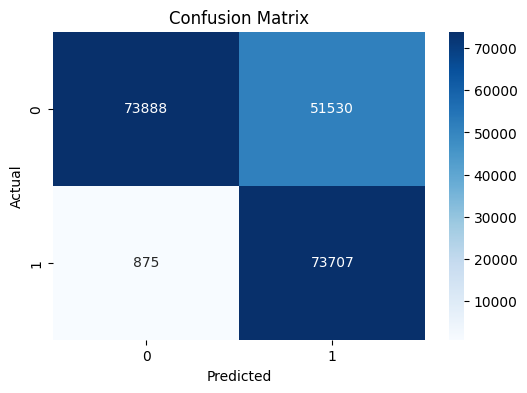

In [68]:
# Predictions
y_pred_risk_prob = risk_ann_model.predict(X_test_risk_scaled)
y_pred_risk = (y_pred_risk_prob > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test_risk, y_pred_risk)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.59      0.74    125418
           1       0.59      0.99      0.74     74582

    accuracy                           0.74    200000
   macro avg       0.79      0.79      0.74    200000
weighted avg       0.84      0.74      0.74    200000



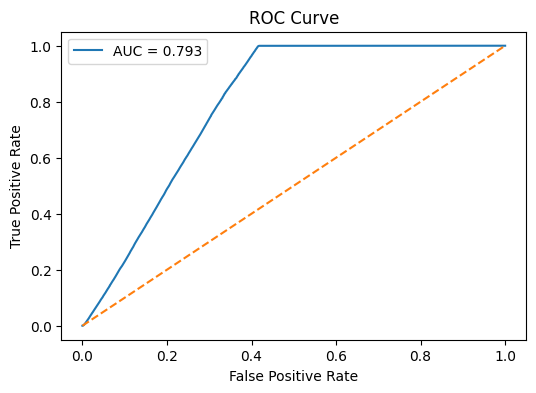

In [69]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_risk, y_pred_risk))

# --- ROC Curve
fpr, tpr, _ = roc_curve(y_test_risk, y_pred_risk_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test_risk, y_pred_risk_prob):.3f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

Testing Other Model

In [70]:
# Import required libraries
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [71]:
# Initialize and train KNN
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can tune 'n_neighbors' for better results
knn_model.fit(X_train_risk_scaled, y_train_risk)

# Predictions on test data
y_pred_knn = knn_model.predict(X_test_risk_scaled)
y_pred_proba_knn = knn_model.predict_proba(X_test_risk_scaled)[:, 1]

In [72]:
# KNN Model Evaluation
print("--- KNN Model Report ---")
print(classification_report(y_test_risk, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test_risk, y_pred_knn))
print("ROC AUC Score:", roc_auc_score(y_test_risk, y_pred_proba_knn))

--- KNN Model Report ---
              precision    recall  f1-score   support

           0       0.77      0.74      0.75    125418
           1       0.59      0.63      0.61     74582

    accuracy                           0.70    200000
   macro avg       0.68      0.68      0.68    200000
weighted avg       0.70      0.70      0.70    200000

Confusion Matrix:
 [[92777 32641]
 [27677 46905]]
ROC AUC Score: 0.777022479444917


In [73]:
## XGBoost
# Initialize and train XGBoost
xgb_model = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_risk_scaled, y_train_risk)

# Predictions on test data
y_pred_xgb = xgb_model.predict(X_test_risk_scaled)
y_pred_proba_xgb = xgb_model.predict_proba(X_test_risk_scaled)[:, 1]

In [74]:
# XGBoost Model Evaluation
print("\n--- XGBoost Model Report ---")
print(classification_report(y_test_risk, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test_risk, y_pred_xgb))
print("ROC AUC Score:", roc_auc_score(y_test_risk, y_pred_proba_xgb))


--- XGBoost Model Report ---
              precision    recall  f1-score   support

           0       1.00      0.60      0.75    125418
           1       0.60      1.00      0.75     74582

    accuracy                           0.75    200000
   macro avg       0.80      0.80      0.75    200000
weighted avg       0.85      0.75      0.75    200000

Confusion Matrix:
 [[75696 49722]
 [   33 74549]]
ROC AUC Score: 0.8012841465315979


In [75]:
# Decision Tree Classifier
# Initialize and train Decision Tree
dt_model = DecisionTreeClassifier(max_depth=10, random_state=42)
dt_model.fit(X_train_risk_scaled, y_train_risk)

# Predictions on test data
y_pred_dt = dt_model.predict(X_test_risk_scaled)
y_pred_proba_dt = dt_model.predict_proba(X_test_risk_scaled)[:, 1]

In [76]:
# Decision Tree Model Evaluation
print("\n--- Decision Tree Model Report ---")
print(classification_report(y_test_risk, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test_risk, y_pred_dt))
print("ROC AUC Score:", roc_auc_score(y_test_risk, y_pred_proba_dt))


--- Decision Tree Model Report ---
              precision    recall  f1-score   support

           0       1.00      0.60      0.75    125418
           1       0.60      1.00      0.75     74582

    accuracy                           0.75    200000
   macro avg       0.80      0.80      0.75    200000
weighted avg       0.85      0.75      0.75    200000

Confusion Matrix:
 [[75720 49698]
 [   64 74518]]
ROC AUC Score: 0.8019704832630308


Fraud Detection → Autoencoder

In [78]:
## features for fraud detection
fraud_features = [
    'CreditScore', 'LoanAmount', 'LoanDuration', 'MonthlyDebtPayments',
    'DebtToIncomeRatio', 'InterestRate', 'Age', 'JobTenure',
    'NumberOfOpenCreditLines', 'NumberOfCreditInquiries',
    'BankruptcyHistory', 'PreviousLoanDefaults', 'MonthlySavings',
    'MonthlyHousingCosts', 'EducationLevel', 'EmployerType'
]

In [79]:
## Extract and pre-process features

df_fraud = df_loan_predict[fraud_features].copy()

# Encode categorical features
fraud_encoders = {}
for col in ['EducationLevel', 'EmployerType']:
    le = LabelEncoder()
    df_fraud[col] = le.fit_transform(df_fraud[col])
    fraud_encoders[col] = le

# Scale features
fraud_scaler = StandardScaler()
df_fraud_scaled = fraud_scaler.fit_transform(df_fraud)


In [81]:
## Build autoencoder model
input_dim = df_fraud_scaled.shape[1]

input_layer = Input(shape=(input_dim,))
encoded = Dense(12, activation='relu')(input_layer)
encoded = Dense(8, activation='relu')(encoded)

decoded = Dense(12, activation='relu')(encoded)
decoded = Dense(input_dim, activation='linear')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(learning_rate=1e-3), loss='mean_absolute_error')
autoencoder.summary()



Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 12)                  │             204 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 12)                  │             108 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 16)                  │             208 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 624 (2.44 KB)

 Trainable params: 624 (2.44 KB)

 Non-trainable params: 0 (0.00 B)

In [82]:
## Training model
history_fraud = autoencoder.fit(
    df_fraud_scaled, df_fraud_scaled,
    epochs=30,
    batch_size=256,
    validation_split=0.2,
    verbose=1
)

Epoch 1/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 0.5951 - val_loss: 0.4066
Epoch 2/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.4053 - val_loss: 0.4036
Epoch 3/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.4036 - val_loss: 0.4039
Epoch 4/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.4036 - val_loss: 0.4025
Epoch 5/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.4034 - val_loss: 0.4034
Epoch 6/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.4033 - val_loss: 0.4032
Epoch 7/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.4033 - val_loss: 0.4039
Epoch 8/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.4031 - val_loss: 0.4030
Epoch 9/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.4033 - val_loss: 0.4031
Epoch 10/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.4030 - val_loss: 0.4042
Epoch 11/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.4034 - val_loss: 0.4035
Epoch 12/30
3125/3125 ━━━━━━━

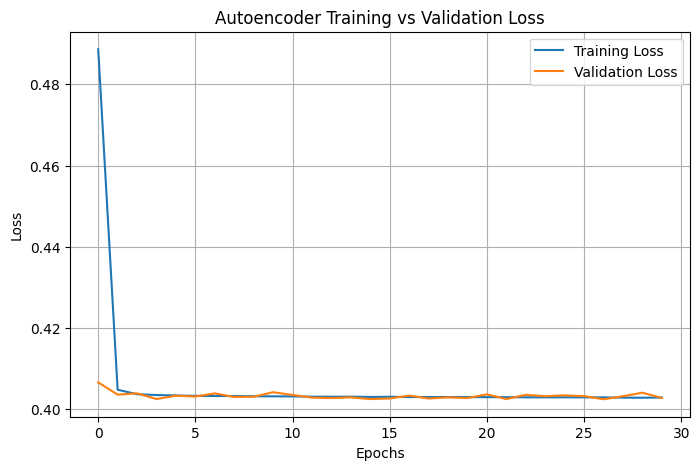

In [83]:
plt.figure(figsize=(8, 5))
plt.plot(history_fraud.history['loss'], label='Training Loss')
plt.plot(history_fraud.history['val_loss'], label='Validation Loss')
plt.title("Autoencoder Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

In [84]:
# Generate predictions from the autoencoder
df_fraud_pred = autoencoder.predict(df_fraud_scaled)

# Calculate reconstruction errors using MAE
reconstruction_errors = np.mean(np.abs(df_fraud_pred - df_fraud_scaled), axis=1)

# Define threshold (e.g., 95th percentile for anomaly detection)
threshold = np.percentile(reconstruction_errors, 95)

31250/31250 ━━━━━━━━━━━━━━━━━━━━ 41s 1ms/step


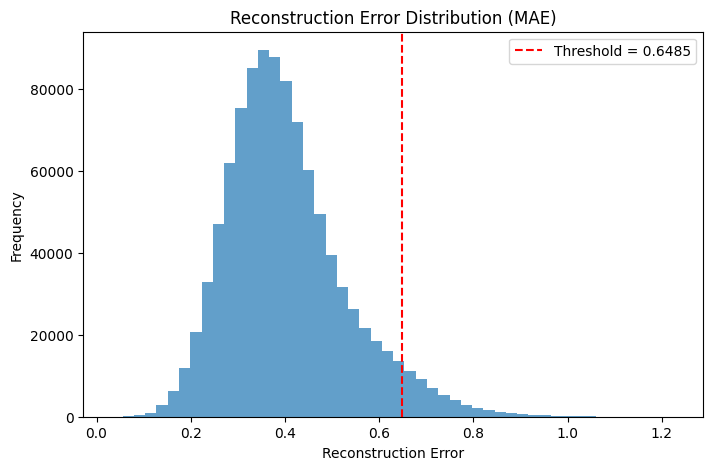

In [85]:
# Visualize reconstruction error distribution
plt.figure(figsize=(8, 5))
plt.hist(reconstruction_errors, bins=50, alpha=0.7)
plt.axvline(threshold, color='red', linestyle='--', label=f'Threshold = {threshold:.4f}')
plt.title("Reconstruction Error Distribution (MAE)")
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [86]:
import numpy as np

# Get reconstructions
reconstructions = autoencoder.predict(df_fraud_scaled)
reconstruction_errors = np.mean(np.square(df_fraud_scaled - reconstructions), axis=1)

# Set threshold at 95th percentile
threshold = np.percentile(reconstruction_errors, 95)
predicted_labels = (reconstruction_errors > threshold).astype(int)

31250/31250 ━━━━━━━━━━━━━━━━━━━━ 42s 1ms/step


Repayment Risk → XGBoost

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
# Feature list (including your custom ones)
repayment_features = [
    'CreditScore', 'AnnualIncome', 'LoanAmount', 'LoanDuration',
    'MonthlyDebtPayments', 'DebtToIncomeRatio', 'PreviousLoanDefaults',
    'BankruptcyHistory', 'InterestRate', 'JobTenure',
    'EmploymentStatus', 'NumberOfDependents', 'HomeOwnershipStatus',
    'RentPayments'
]

In [89]:
# Extract features and target
df_repay = df_loan_predict[repayment_features + ['LoanApproved']].copy()

In [90]:
# Encode categorical features
repayment_encoders = {}
for col in ['EmploymentStatus', 'HomeOwnershipStatus']:
    le = LabelEncoder()
    df_repay[col] = le.fit_transform(df_repay[col])
    repayment_encoders[col] = le

In [91]:
# Split features and target
X_repay = df_repay.drop('LoanApproved', axis=1)
y_repay = df_repay['LoanApproved']

X_train_repay, X_test_repay, y_train_repay, y_test_repay = train_test_split(X_repay, y_repay, test_size=0.2, random_state=42)

# Train XGBoost
xgb_repay_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_repay_model.fit(X_train_repay, y_train_repay)
repayment_risk_features = list(X_repay.columns)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:18:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [92]:
# Predictions & Evaluation
y_pred_repay = xgb_repay_model.predict(X_test_repay)
y_pred_repay_prob = xgb_repay_model.predict_proba(X_test_repay)[:, 1]

In [93]:
print("\nClassification Report:")
print(classification_report(y_test_repay, y_pred_repay))
print("ROC AUC Score:", roc_auc_score(y_test_repay, y_pred_repay_prob))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.61      0.75    125418
           1       0.60      0.99      0.75     74582

    accuracy                           0.75    200000
   macro avg       0.79      0.80      0.75    200000
weighted avg       0.84      0.75      0.75    200000

ROC AUC Score: 0.801417624292341


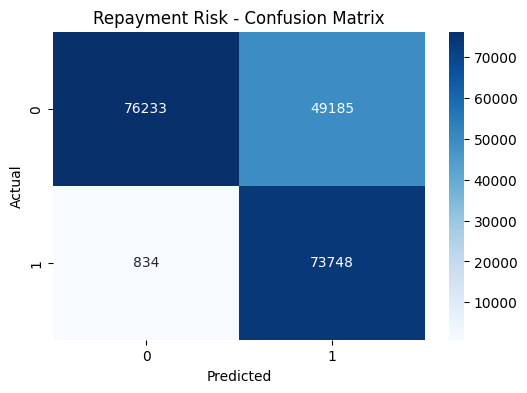

In [94]:
# Confusion Matrix
cm = confusion_matrix(y_test_repay, y_pred_repay)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Repayment Risk - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Rule-Based

In [95]:
def recommend_loan(user):
    recommendation = {}

    # Base loan amount logic
    income = user['income']
    credit = user['CreditScore']
    tenure = user['JobTenure']
    purpose = user['LoanPurpose'].lower()
    dti = user['DebtToIncomeRatio']

    # Max loan amount estimation (conservative logic)
    if purpose == 'home':
        max_amount = income * 100
        term = 360
        base_rate = 6.0
    elif purpose == 'auto':
        max_amount = income * 30
        term = 60
        base_rate = 7.5
    elif purpose == 'education':
        max_amount = income * 40
        term = 120
        base_rate = 6.5
    else:  # personal or others
        max_amount = income * 10
        term = 24
        base_rate = 12.0

    # Adjust interest rate by credit score
    if credit >= 800:
        rate = base_rate - 0.5
    elif credit >= 700:
        rate = base_rate
    elif credit >= 600:
        rate = base_rate + 1.5
    else:
        rate = base_rate + 3.0

    # ✅ Stricter Conditions for Unemployed Applicants
    if EmploymentStatus == 'unemployed':
        if income < 2 * (dti * income) or credit < 700:
            max_amount *= 0.5  # Reduce loan amount by 50% if conditions not met
            recommendation['Note'] = 'Unemployed applicant: Lower loan amount due to high risk.'

    # ✅ Debt-to-Income based restriction
    if dti > 0.45:
        max_amount *= 0.5
        recommendation['Note'] = recommendation.get('Note', '') + ' High DTI: Loan amount reduced.'

    # ✅ Employment tenure check (Short job history)
    if tenure < 12:
        max_amount *= 0.75
        recommendation['Note'] = recommendation.get('Note', '') + ' Short job history: Lower recommended amount.'

    # ✅ Additional Penalty for Low Credit Score
    if credit < 700:
        max_amount *= 0.85
        recommendation['Note'] = recommendation.get('Note', '') + ' Moderate credit score: Loan amount reduced.'

    # Final recommended values
    recommendation['Recommended Loan Amount'] = round(max_amount, 2)
    recommendation['Recommended Term (months)'] = term
    recommendation['Estimated Interest Rate (%)'] = round(rate, 2)
    recommendation['Loan Purpose'] = purpose.title()

    return recommendation

SHAP-based Explanation

In [96]:
import shap
import numpy as np

In [123]:
# Subset a few rows from training set for background
X_background = X_train_elig[:100]

# Create explainer for the Neural Network
explainer = shap.Explainer(eligibility_model, X_background)


In [124]:
# Explain a sample prediction (e.g., first test sample)
shap_values = explainer(X_test_elig[:1])

# Visualize local explanation for one prediction
shap.plots.waterfall(shap_values[0], max_display=10)

PermutationExplainer explainer: 101it [00:54,  1.53it/s]


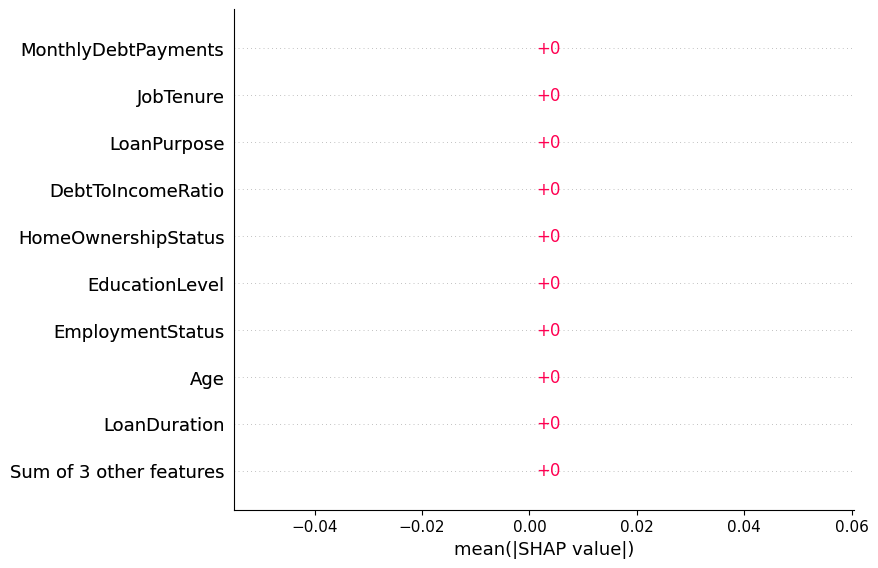

In [125]:
# Use a few test examples for global overview
shap_values_all = explainer(X_test_elig[:100])
shap.plots.bar(shap_values_all)

Random Forext Feature importance

Wraping up

In [126]:
model_feature_map = {
    'ann': [
        'loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
        'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'purpose',
        'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
        'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'application_type',
        'mort_acc', 'pub_rec_bankruptcies'
    ],
    'fraud': [
        'CreditScore', 'LoanAmount', 'LoanDuration', 'MonthlyDebtPayments',
        'DebtToIncomeRatio', 'InterestRate', 'Age', 'JobTenure',
        'NumberOfOpenCreditLines', 'NumberOfCreditInquiries',
        'BankruptcyHistory', 'PreviousLoanDefaults', 'MonthlySavings',
        'MonthlyHousingCosts', 'EducationLevel', 'EmployerType'
    ]
}

In [127]:
# Define columns after training to ensure input consistency
eligibility_model_columns = pd.get_dummies(pd.DataFrame(X_train_elig)).columns.tolist()

In [128]:
def run_loan_pipeline(user_input):
    results = {}

    # --- Rule-based Loan Rejection for Extreme Case ---
    if user_input['LoanAmount'] > user_input['MonthlyIncome'] * 12:
        results['Loan Eligibility'] = "Rejected"
        results['Credit Risk Score'] = "Too High"
        results['Fraud Check'] = "High Loan-to-Income"
        results['Top Risk Factor'] = "Loan Amount vs Income"
        return results

    # --- Default profile fallback ---
    default_profile = {
        'AnnualIncome': user_input['MonthlyIncome'] * 12,
        'LoanDuration': user_input['LoanDuration'],
        'LoanAmount': user_input['LoanAmount'],
        'CreditScore': user_input['CreditScore'],
        'EmploymentStatus': user_input['EmploymentStatus'],
        'JobTenure': user_input['JobTenure'],
        'LoanPurpose': user_input['LoanPurpose'],
        'MonthlyDebtPayments': user_input['MonthlyDebtPayments'],
        'DebtToIncomeRatio': user_input['MonthlyDebtPayments'] / max(user_input['MonthlyIncome'], 1),
        'InterestRate': 5.5,
        'Age': 18,
        'EducationLevel': 'Bachelor',
        'EmployerType': 'Private',
        'NumberOfOpenCreditLines': 5,
        'NumberOfCreditInquiries': 2,
        'BankruptcyHistory': 0,
        'PreviousLoanDefaults': 0,
        'MonthlySavings': 500,
        'MonthlyHousingCosts': 1200,
        'NumberOfDependents': 0,
        'HomeOwnershipStatus': 'Rent',
        'RentPayments': 800
    }

    full_input = {**default_profile, **user_input}

    # --- Loan Eligibility ---
    eligibility_df = pd.DataFrame([full_input])
    eligibility_df_encoded = pd.get_dummies(eligibility_df)
    eligibility_df_encoded = eligibility_df_encoded.reindex(columns=eligibility_model_columns, fill_value=0)
    eligibility_scaled = scaler_eligibility_check.transform(eligibility_df_encoded)
    nn_pred = eligibility_model.predict(eligibility_scaled)[0][0]
    results['Loan Eligibility'] = 'Approved' if nn_pred > 0.5 else 'Rejected'

    # --- Credit Risk ANN ---
    ann_keys = model_feature_map['ann']
    ann_features = pd.DataFrame([{k: full_input[k] for k in risk_ann_features}])
    ##ann_features = pd.DataFrame([{k: full_input.get(k, 0) for k in ann_keys}])
    ann_scaled = scaler_risk.transform(ann_features)
    ann_pred = risk_ann_model.predict(ann_scaled)[0][0]
    results['Credit Risk Score'] = round(float(ann_pred), 2)

    # --- Encode user input for fraud detection ---
    for col in ['EducationLevel', 'EmployerType']:
        if col in full_input:
            original_value = str(full_input[col])  # ensure it's a Python string
            if original_value in fraud_encoders[col].classes_:
                full_input[col] = fraud_encoders[col].transform([original_value])[0]
            else:
            # handle unseen label by setting a default or most common label
                full_input[col] = 0  # or use np.argmax(np.bincount(...)) if needed

    for col in ['EmploymentStatus', 'HomeOwnershipStatus']:
        if col in full_input:
            original_value = str(full_input[col])
            if original_value in repayment_encoders[col].classes_:
                full_input[col] = repayment_encoders[col].transform([original_value])[0]
            else:
                full_input[col] = 0

    # --- Autoencoder Fraud Detection ---
    fraud_keys = model_feature_map['fraud']
    fraud_features = pd.DataFrame([{k: full_input[k] for k in fraud_keys if k in full_input}])
    fraud_scaled = fraud_scaler.transform(fraud_features)
    fraud_recon = autoencoder.predict(fraud_scaled)
    recon_error = np.mean(np.square(fraud_scaled - fraud_recon), axis=1)
    threshold = np.percentile(recon_error, 95)
    results['Fraud Check'] = 'Anomaly' if recon_error[0] > threshold else 'Normal'

    # --- Repayment Risk via XGBoost ---
    risk_features = pd.DataFrame([{k: full_input[k] for k in repayment_risk_features if k in full_input}])
    #risk_scaled = risk_scaler.transform(risk_features)
    risk_pred = xgb_repay_model.predict_proba(risk_features)[0][1]
    results['Repayment Risk'] = round(risk_pred, 2)

    # --- SHAP Explanation ---
    shap_exp = shap.Explainer(eligibility_model,  X_train_elig[:100])
    shap_vals = shap_exp(eligibility_scaled)
    top_feature = eligibility_df_encoded.columns[np.argmax(np.abs(shap_vals.values[0]))]
    results['Top Risk Factor'] = top_feature

    # --- Get Feature Importance ---
    #feature_importance = rf_model_elig.feature_importances_
    #top_feature_index = np.argmax(feature_importance)
    #top_feature = X_elig.columns[top_feature_index]
    #results['Top Risk Factor'] = top_feature

    return results

In [129]:
# --- User Input Section ---
print("\nWelcome to Loan Eligibility Advisor (Multi model checker)")
user_inputs = {
    "MonthlyIncome": float(input("Enter your monthly income: ")),
    "LoanAmount": float(input("Please Enter requested loan amount: ")),
    "LoanDuration": int(input("Please Enter loan term in months: ")),
    "CreditScore": int(input("Please Enter your credit score (300-850): ")),
    "EmploymentStatus": input("Please Enter your employment status (Employed, Unemployed, Self-Employed): "),
    "JobTenure": int(input("Please Enter your employment tenure in months: ")),
    "LoanPurpose": input("Please Enter loan purpose (Home, Auto, Education, Personal, etc.): "),
    "MonthlyDebtPayments": float(input("Please Enter your monthly debt payments: "))
}

print("\nProcessing your application...")
prediction_results = run_loan_pipeline(user_inputs)
print("\n--- Loan Eligibility Report ---")
for k, v in prediction_results.items():
    print(f"{k}: {v}")



Welcome to Loan Eligibility Advisor (Multi model checker)
Enter your monthly income: 5000
Please Enter requested loan amount: 35000
Please Enter loan term in months: 24
Please Enter your credit score (300-850): 550
Please Enter your employment status (Employed, Unemployed, Self-Employed): Employed
Please Enter your employment tenure in months: 21
Please Enter loan purpose (Home, Auto, Education, Personal, etc.): Personal
Please Enter your monthly debt payments: 200

Processing your application...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step

--- Loan Eligibility Report ---
Loan Eligibility: Approved
Credit Risk Score: 0.68
Fraud Check: Normal
Repayment Risk: 0.550000011920929
Top Risk Factor: LoanAmount


Integrate with OPEN AI api for friendly chat

In [130]:
import openai
from openai import OpenAI

In [131]:
from getpass import getpass
import os

os.environ["OPENAI_API_KEY"] = getpass("OpenAI ")

OpenAI ··········


In [132]:
from openai import OpenAI

client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

def explain_decision_with_gpt(report_dict):
    summary = "\n".join([f"{k}: {v}" for k, v in report_dict.items()])
    prompt = f"""
    Based on the following loan application assessment:

    {summary}

    Write a detailed and friendly explanation to the applicant about the result.
    Mention that they have a high chance of approval, but further verification is required.
    Explain that they will need to follow up with the loan officer for document verification and approval.
    Include that this process may take 1 to 2 weeks.
    Emphasize that the Credit Risk Score and Repayment Risk are calculated based on financial information and expressed in percentage form.
    Highlight the Top Risk Factor and how it influences the decision.
    Provide contact information for the loan officer (john.doe@loancredit.com and phone: 964-7878-9966).
    Avoid using congratulations and encourage them to stay in touch with the loan officer for further steps.
    Include that there is no bias towards any particular loan purpose.
    """

    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[
            {"role": "system", "content": "You are a financial assistant helping users understand possible loan outcomes. Provide professional, clear, and realistic advice. Avoid congratulatory language and emphasize the need for further confirmation."},
            {"role": "user", "content": prompt}
        ],
        temperature=0.7,
        max_tokens=300
    )

    return response.choices[0].message.content

In [133]:
print("\n--- Your Friendly Loan Eligibility Test ^_^ ---")
explanation = explain_decision_with_gpt(prediction_results)
print(explanation)


--- Your Friendly Loan Eligibility Test ^_^ ---
Dear Applicant,

Thank you for your recent loan application. We have completed an initial assessment, and here are the key points regarding your eligibility and the next steps in the process.

Your loan eligibility has been approved, which indicates a favorable outcome based on our preliminary evaluation. However, it is important to note that further verification is required before final approval can be granted. The assessment includes several factors that help us understand your financial situation better.

Your Credit Risk Score stands at 0.68, which is a measure of your creditworthiness based on your financial information. This score reflects your potential risk as a borrower and is expressed in percentage form. A higher score generally indicates a lower risk, but it is essential to keep in mind that this score is just one part of the overall assessment.

Additionally, your Repayment Risk is calculated at 0.55, also expressed as a per